# Init

In [1]:
import os, sys, time

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "../")
import toolsdiadem.tools as dia
import toolsdiadem.ser as ser
from toolsdiadem.Probe import Probe
from toolsdiadem.ConfigSer import ConfigSer

In [2]:
#%matplotlib qt5
%load_ext autoreload
%autoreload 2

In [3]:
cmap='jet'
configFilename = f"C:/Users/pleroy/Documents/CAMILL/SER/WR15_v2/WR15_plaqueSupport.ini"
conf = ConfigSer(configFilename)

# Données de la probe

In [4]:
probe = Probe(os.path.join(conf.base_path, "S11FDC_WR15.s1p"))

# Calcul du fond de chambre
ref: ser4siepel_multiband_scan_elev_F2C.sce

In [5]:
S11_f2c = ser.computeF2C(conf.base_path, conf.dic_dir, conf.nb_elev, conf.nb_freq, conf.nb_ssb)

nbAbs = 19
20200701
000_A
001_C
002_E
003_W
004_V
005_G
20200703
006_L
007_M
008_X
009_H
010_I
011_K
012_J
013_O
014_N
015_D
016_T
017_AB_u
018_N_u


Text(0.5, 1.0, 'time domain')

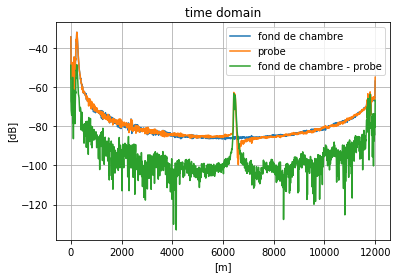

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(probe.d, ser.dB(np.fft.ifft(S11_f2c)), label="fond de chambre")
ax.plot(probe.d, ser.dB(np.fft.ifft(probe.S11)), label="probe")
ax.plot(probe.d, ser.dB(np.fft.ifft(S11_f2c - probe.S11)), label="fond de chambre - probe")
ax.grid()
ax.legend()
ax.set_xlabel("[m]")
ax.set_ylabel("[dB]")
ax.set_title("time domain")

# Sauvegarde des données

In [ ]:
probe.data[:,1] = np.real(S11_f2c)
probe.data[:,2] = np.imag(S11_f2c)
np.savetxt( f"{conf.out_path}/data/WR15_S11_fond_de_chambre.txt", probe.data, header="#GHz real imag")